## Stil Transferi

### Kütüphanelerin Yüklenmesi

In [4]:
import tensorflow as tf
import tensorflow_hub as hub

In [5]:
from PIL import Image
import numpy as np

### Modelin Yüklenmesi ve Fonksiyonların Tanımlanması

In [8]:
model = hub.load("https://tfhub.dev/google/magenta/arbitrary-image-stylization-v1-256/2")

In [9]:
def load_image(image_path, max_dim):
  img = Image.open(image_path).convert('RGB')
  img.thumbnail((max_dim, max_dim))
  arr = np.array(img)/255.0
  return tf.expand_dims(arr.astype(np.float32), axis=0)

In [15]:
def stylize(content_path, style_path, content_max=512, style_max=256):
  content = load_image(content_path, content_max)
  style = load_image(style_path, style_max)
  outputs = model(tf.constant(content), tf.constant(style))
  stylized = outputs[0][0].numpy()
  stylized = (stylized*255).clip(0,255).astype(np.uint8)
  return Image.fromarray(stylized)

### Dosyaların Yüklenmesi

In [16]:
from google.colab import files

print('İçerik görsellerini yükleyin😊 ')
uploaded = files.upload()
content_path = list(uploaded.keys())[0]

İçerik görsellerini yükleyin😊 


Saving ben.jpg to ben (1).jpg


In [13]:
print('Stil dosyanızı yükleyin😊 ')
uploaded = files.upload()
style_path = list(uploaded.keys())[0]

Stil dosyanızı yükleyin😊 


Saving cubic.jpg to cubic.jpg


### Stil Transferinin Yapılması

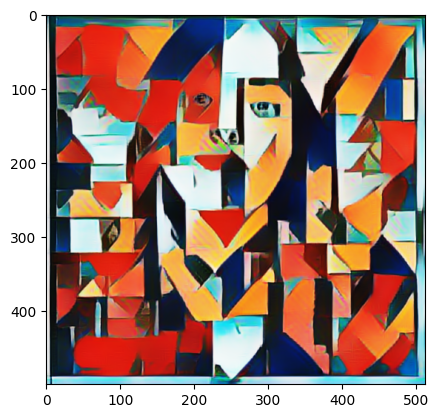

In [17]:
import matplotlib.pyplot as plt

result = stylize(content_path, style_path)
plt.imshow(result)

### Kaydetme İşlemleri

In [18]:
result.save('result.jpg')

In [19]:
files.download('result.jpg')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>